In [1]:
import matplotlib.pyplot as plt
import yqd

### Load in necessary libraries for data input and normalization
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from my_answers import *
### load in and normalize the dataset
dataset = np.loadtxt('datasets/normalized_apple_prices.csv')
original_dataset = np.loadtxt('datasets/apple_prices.csv')

/Users/yifantian/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/yifantian/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


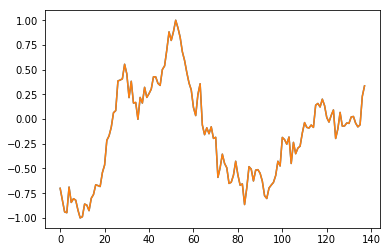

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(-1, 1), copy=True)
# scaler.fit(original_dataset)

vmax = (max(original_dataset))
vmin = (min(original_dataset))
vrange = (vmax-vmin)

def scale(val):
    return -1.0+2.0*(val-vmin)/vrange

# print(scale(original_dataset))

# plt.plot(original_dataset)
plt.plot(dataset)
plt.plot(np.flip(scale(original_dataset),axis=0))
plt.show()

In [3]:
# yf_data = yqd.load_yahoo_quote('LABU', '201704013', '20180414')
# yf_data = yqd.load_yahoo_quote('JOBS', '201704013', '20180414')
# yf_data = yqd.load_yahoo_quote('AVGO', '201704013', '20180414')
# yf_data = yqd.load_yahoo_quote('JPM', '201704013', '20180414')
# yf_data = yqd.load_yahoo_quote('MGC', '201704013', '20180414')
# yf_data = yqd.load_yahoo_quote('BRK.B', '201704013', '20180414')
# yf_data = yqd.load_yahoo_quote('MILN', '201704013', '20180414')

# yf_data = yqd.load_yahoo_quote('V', '201704013', '20180414')
# yf_data = yqd.load_yahoo_quote('QQQC', '201704013', '20180414')
# yf_data = yqd.load_yahoo_quote('BAC', '201704013', '20180414')
# yf_data = yqd.load_yahoo_quote('GOOG', '201704013', '20180414')
# yf_data = yqd.load_yahoo_quote('SPLV', '201704013', '20180414')
# yf_data = yqd.load_yahoo_quote('BABA', '201704013', '20180414')
# yf_data = yqd.load_yahoo_quote('ISRG', '201704013', '20180414')

# yf_data = yqd.load_yahoo_quote('FB', '201704013', '20180414')
# yf_data = yqd.load_yahoo_quote('AMZN', '201704013', '20180414')
yf_data = yqd.load_yahoo_quote('AAPL', '201704013', '20180414')
# yf_data = yqd.load_yahoo_quote('INTC', '201704013', '20180414')
# yf_data = yqd.load_yahoo_quote('NVDA', '201704013', '20180414')
# yf_data = yqd.load_yahoo_quote('MSFT', '201704013', '20180414')






(260,)


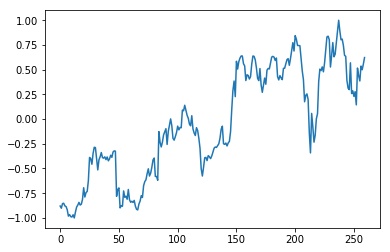

In [4]:
# print(yf_data)
history = []
history1 = []
days = []
for i,day in enumerate(yf_data[1:-1]):
    data = day.split(',')
#     print(data)
#     print(str(data[0]),float(data[1]),float(data[2]),float(data[3]),float(data[4]),float(data[6]))
    history.append([i,str(data[0]),float(data[1]),float(data[2]),float(data[3]),float(data[4]),float(data[6])])
    days.append(i)
    history1.append(float(data[1]))

# print(history)
# plt.plot(days, history1)
# plt.show()

print(np.array(history1).shape)
stock_dataset = np.array(history1)

smax = (max(stock_dataset))
smin = (min(stock_dataset))
srange = (smax-smin)

def stock_scale(val):
    return -1.0+2.0*(val-smin)/srange

stock_dataset = stock_scale(stock_dataset)

# plt.plot(original_dataset)
plt.plot(stock_dataset)
plt.show()

In [5]:
odd_nums = np.array([1,3,5,7,9,11,13])

In [6]:
# run a window of size 2 over the odd number sequence and display the results
window_size = 2

X = []
X.append(odd_nums[0:2])
X.append(odd_nums[1:3])
X.append(odd_nums[2:4])
X.append(odd_nums[3:5])
X.append(odd_nums[4:6])

y = odd_nums[2:]

X = np.asarray(X)
y = np.asarray(y)
y = np.reshape(y, (len(y),1)) #optional

assert(type(X).__name__ == 'ndarray')
assert(type(y).__name__ == 'ndarray')
assert(X.shape == (5,2))
assert(y.shape in [(5,1), (5,)])

# print out input/output pairs --> here input = X, corresponding output = y
print ('--- the input X will look like ----')
print (X)

print ('--- the associated output y will look like ----')
print (y)

--- the input X will look like ----
[[ 1  3]
 [ 3  5]
 [ 5  7]
 [ 7  9]
 [ 9 11]]
--- the associated output y will look like ----
[[ 5]
 [ 7]
 [ 9]
 [11]
 [13]]


In [7]:
### TODO: implement the function window_transform_series in the file my_answers.py
from my_answers import window_transform_series

In [8]:
print(stock_dataset.shape)

(260,)


In [9]:
# window the data using your windowing function
window_size = 6
# X,y = window_transform_series(series = dataset, window_size = window_size)
X,y = window_transform_series(series = stock_dataset, window_size = window_size)

# print out input/output pairs --> here input = X, corresponding output = y
# print ('--- the input X will look like ----')
# print (X)

# print ('--- the associated output y will look like ----')
# print (y)

In [10]:
# split our dataset into training / testing sets
train_test_split = int(np.ceil(2*len(y)/float(3)))   # set the split point

# partition the training set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

# keep the last chunk for testing
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

# NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, window size, stepsize] 
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], window_size, 1)))

In [11]:
### TODO: create required RNN model
# import keras network libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras

# given - fix random seed - so we can all reproduce the same results on our default time series
np.random.seed(0)

# TODO: implement build_part1_RNN in my_answers.py
from my_answers import build_part1_RNN
model = build_part1_RNN(window_size)

# build model using keras documentation recommended optimizer initialization
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [12]:
# run your model!
model.fit(X_train, y_train, epochs=1000, batch_size=50, verbose=0)

# print(y_train)

[[[0.51123997]
  [0.34590285]
  [0.27048596]
  [0.34445257]
  [0.41503541]
  [0.35267099]]

 [[0.34590285]
  [0.27048596]
  [0.34445257]
  [0.41503541]
  [0.35267099]
  [0.49528628]]

 [[0.27048596]
  [0.34445257]
  [0.41503541]
  [0.35267099]
  [0.49528628]
  [0.51220705]]

 [[0.34445257]
  [0.41503541]
  [0.35267099]
  [0.49528628]
  [0.51220705]
  [0.50737234]]

 [[0.41503541]
  [0.35267099]
  [0.49528628]
  [0.51220705]
  [0.50737234]
  [0.56683625]]]
[[0.38790256]
 [0.49804932]
 [0.5252972 ]
 [0.51683617]
 [0.54897153]]


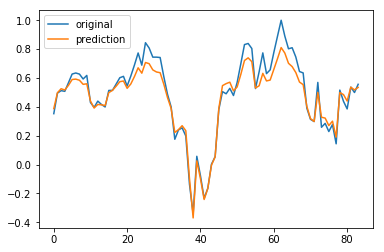

[[0.51123997]
 [0.34590285]
 [0.27048596]
 [0.34445257]
 [0.41503541]
 [0.35267099]]

[[0.3879025]]
[0.49528628]
[[0.34590285]
 [0.27048596]
 [0.34445257]
 [0.41503541]
 [0.35267099]
 [0.49528628]]

[[0.49804935]]
[0.51220705]

[[0.35267099]
 [0.49528628]]
[[0.38790256]
 [0.49804932]]
[[0.49528628]
 [0.51220705]]

[[0.38790256]
 [0.49804932]
 [0.5252972 ]
 [0.51683617]
 [0.54897153]]
[[0.49528628]
 [0.51220705]
 [0.50737234]
 [0.56683625]
 [0.62726652]]
(83, 1)
(83, 1)
[[ 0.03523157]
 [ 0.00276304]
 [ 0.01309018]
 [ 0.00946383]
 [-0.01786472]]

[[ 0.14261529]
 [ 0.01692077]
 [-0.00483471]
 [ 0.05946392]
 [ 0.06043027]]


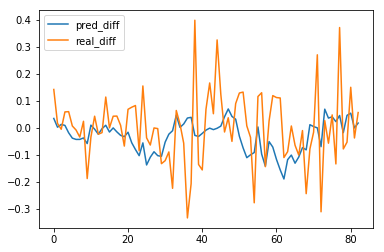

In [13]:
# generate predictions for training
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

print(X_test[:5])
print(test_predict[:5])

plt.plot(X_test[:,-1,:],label='original')
plt.plot(test_predict[:,-1],label='prediction')
plt.legend()
plt.show()


print(X_test[0])
test_predict1 = model.predict(np.array([X_test[0]]))
print()
print(test_predict1)
print(X_test[1][-1])

print(X_test[1])
test_predict1 = model.predict(np.array([X_test[1]]))
print()
print(test_predict1)
print(X_test[2][-1])


print()
real_val_day0 = np.array([day[-1] for day in X_test[:-1]])
real_val_day1 = np.array([day[-1] for day in X_test[1:]])

print(real_val_day0[:2])
print(test_predict[:2])
print(real_val_day1[:2])

print()

print(test_predict[:5])
print(real_val_day1[:5])

print(test_predict[:-1].shape)
print(real_val_day1.shape)


# pred_diff = test_predict[:-1]-real_val_day1     # what the diff of price between pred and real
pred_diff = test_predict[:-1]-real_val_day0     # what I predict will happen
real_diff = real_val_day1-real_val_day0    # what real happened


print(pred_diff[:5])
print()
print(real_diff[:5])

pred_tread = [1 if item > 0 else -1 for item in pred_diff]
real_tread = [1 if item > 0 else -1 for item in real_diff]

plt.plot(pred_diff, label='pred_diff')
plt.plot(real_diff, label='real_diff')

# plt.plot(pred_tread, label='pred_tread')
# plt.plot(real_tread, label='real_tread')

plt.legend()
plt.show()


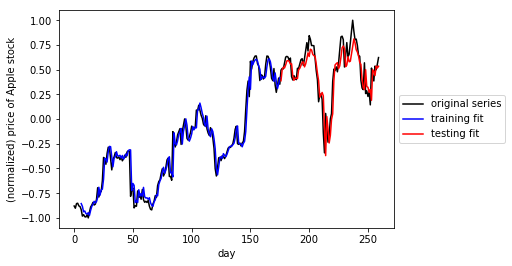

In [14]:
### Plot everything - the original series as well as predictions on training and testing sets
import matplotlib.pyplot as plt
%matplotlib inline

# plot original series
plt.plot(stock_dataset,color = 'k')

# plot training set prediction
split_pt = train_test_split + window_size 
plt.plot(np.arange(window_size,split_pt,1),train_predict,color = 'b')

# plot testing set prediction
plt.plot(np.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('(normalized) price of Apple stock')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()